### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

### Load and Understand data

In [3]:
df = pd.read_csv("train.csv")

In [4]:
## Check top few records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Check data information available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- we have 1460 rows and 81 columns in raw data.

In [6]:
## Check data size

df.shape

(1460, 81)

#### Check null values present in the data

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Data Cleaning and Preprocessing

- Let's drop columns where more than 75% of data is empty.

In [8]:
## let's calculate 75% data count

threshold = df.shape[0] * 0.75
threshold

1095.0

- So we will drop all columns where null count is > 1095

In [9]:
df_cleaned = df.dropna(axis=1, thresh=threshold)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
## so the total number of columns is reduced to 75
df_cleaned.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

#### Fill null values

In [12]:
df_cleaned.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [13]:
## Since Lotfrontage is a numerical value, let's fill the null value with 0.0
df_cleaned.LotFrontage = df_cleaned.LotFrontage.fillna(0.0)

In [14]:
df_cleaned.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [15]:
## we will replace null values with "NA"

df_cleaned.BsmtQual = df_cleaned.BsmtQual.fillna("NA")

In [16]:
df_cleaned.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [17]:
## we will replace null values with "NA"
df_cleaned.BsmtCond = df_cleaned.BsmtCond.fillna("NA")

In [18]:
df_cleaned.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [19]:
## we will replace null values with "NA"
df_cleaned.BsmtExposure = df_cleaned.BsmtExposure.fillna("NA")

In [20]:
df_cleaned.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [21]:
## we will replace null values with "NA"
df_cleaned.BsmtFinType1 = df_cleaned.BsmtFinType1.fillna("NA")

In [22]:
df_cleaned.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [23]:
## we will replace null values with "NA"
df_cleaned.BsmtFinType2 = df_cleaned.BsmtFinType2.fillna("NA")

In [24]:
df_cleaned.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [25]:
## we will replace null values with "NA"
df_cleaned.Electrical = df_cleaned.Electrical.fillna("NA")

In [26]:
df_cleaned.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [27]:
## we will replace null values with "NA"
df_cleaned.GarageType = df_cleaned.GarageType.fillna("NA")

In [28]:
df_cleaned.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [29]:
## we will replace null values with Mean value
df_cleaned.GarageYrBlt = df_cleaned.GarageYrBlt.fillna(df_cleaned.GarageYrBlt.mean())

In [30]:
df_cleaned.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [31]:
## we will replace null values with "NA"
df_cleaned.GarageFinish = df_cleaned.GarageFinish.fillna("NA")

In [32]:
df_cleaned.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [33]:
## we will replace null values with "NA"
df_cleaned.GarageQual = df_cleaned.GarageQual.fillna("NA")

In [34]:
df_cleaned.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [35]:
## we will replace null values with "NA"
df_cleaned.GarageCond = df_cleaned.GarageCond.fillna("NA")

### Identify numerical and categorical features

In [36]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


- Numerical Features
    * Id
    * LotFrontage
    * LotArea
    * YearBuilt
    * YearRemodAdd
    * MasVnrArea
    * BsmtFinSF1
    * BsmtFinSF2
    * BsmtUnfSF
    * TotalBsmtSF
    * 1stFlrSF
    * 2ndFlrSF
    * LowQualFinSF
    * GrLivArea
    * BsmtFullBath
    * BsmtHalfBath
    * FullBath
    * HalfBath
    * BedroomAbvGr
    * KitchenAbvGr
    * TotRmsAbvGrd
    * Fireplaces
    * GarageYrBlt
    * GarageCars
    * GarageArea
    * WoodDeckSF
    * OpenPorchSF
    * EnclosedPorch
    * 3SsnPorch
    * ScreenPorch
    * PoolArea
    * MiscVal
    * MoSold
    * YrSold
    
- Categorical Features:
    * MSSubClass, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig
    * LandSlope, Neighborhood, Neighborhood, Condition1, Condition2, BldgType
    * HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual
    * ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating
    * HeatingQC, CentralAir, Electrical, KitchenQual, Functional, GarageType, GarageFinish, GarageQual
    * GarageCond, GarageCond, PavedDrive, SaleType, SaleCondition

### Exploratory Data Analysis

#### Check summary statistics for numerical columns

In [37]:
variables = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'SalePrice'
]
df1 = df_cleaned.loc[:,variables]
df1.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,34.664304,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Heatmap

#### Data Visualisation

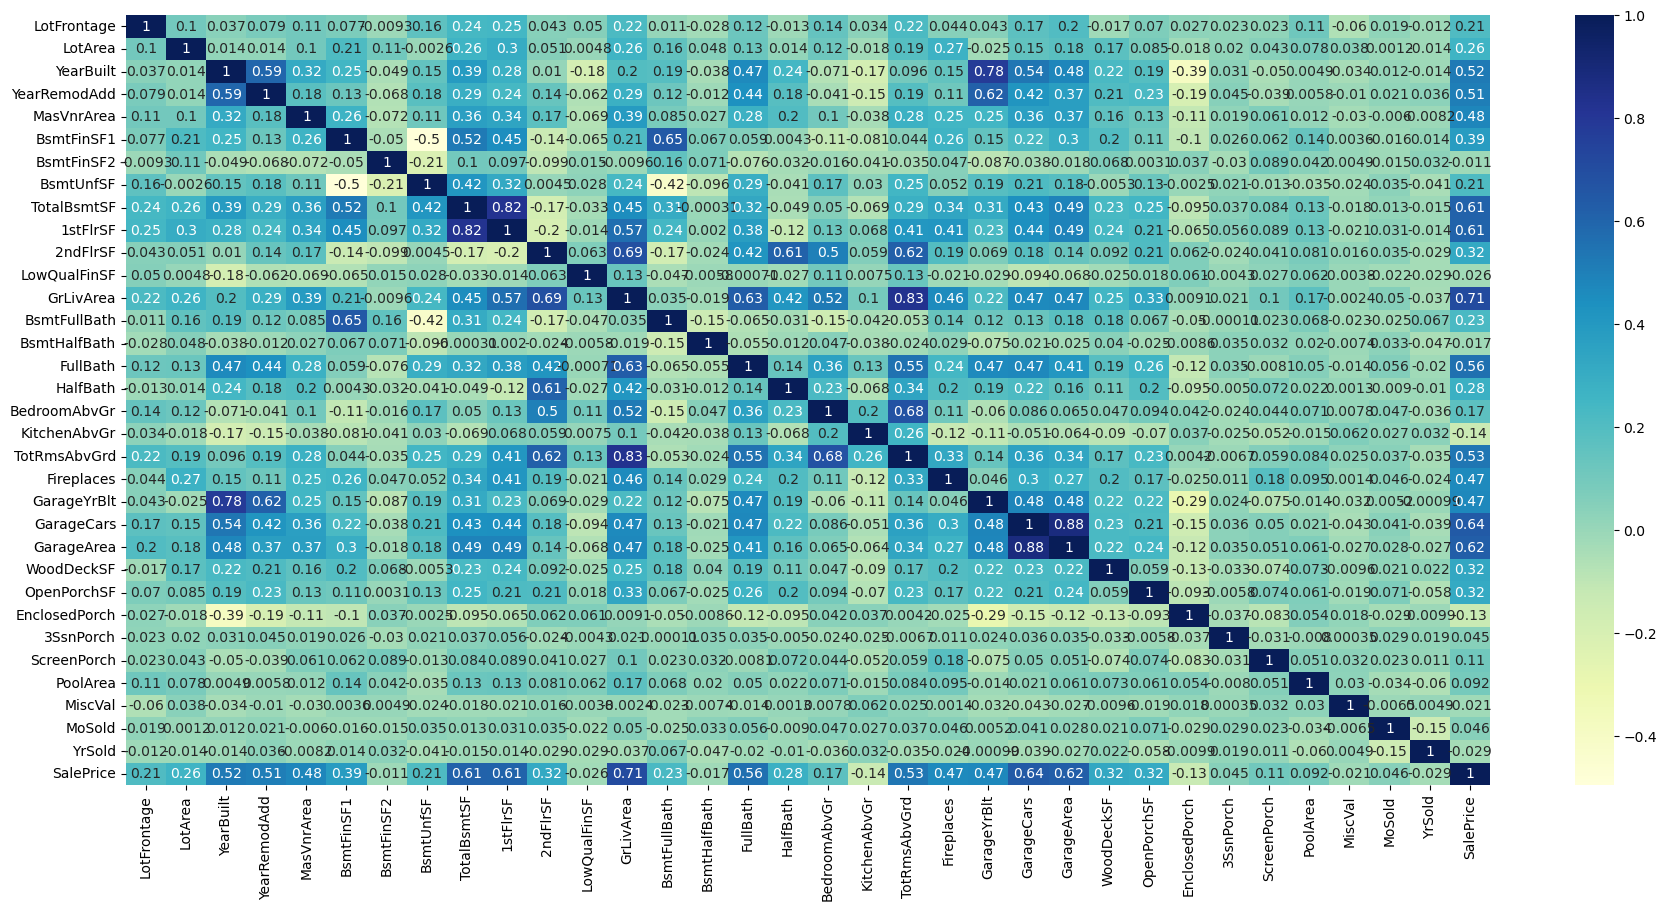

In [38]:
## Check the correlation among variables

plt.figure(figsize = (22, 10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Visualisation of Numeric Plots

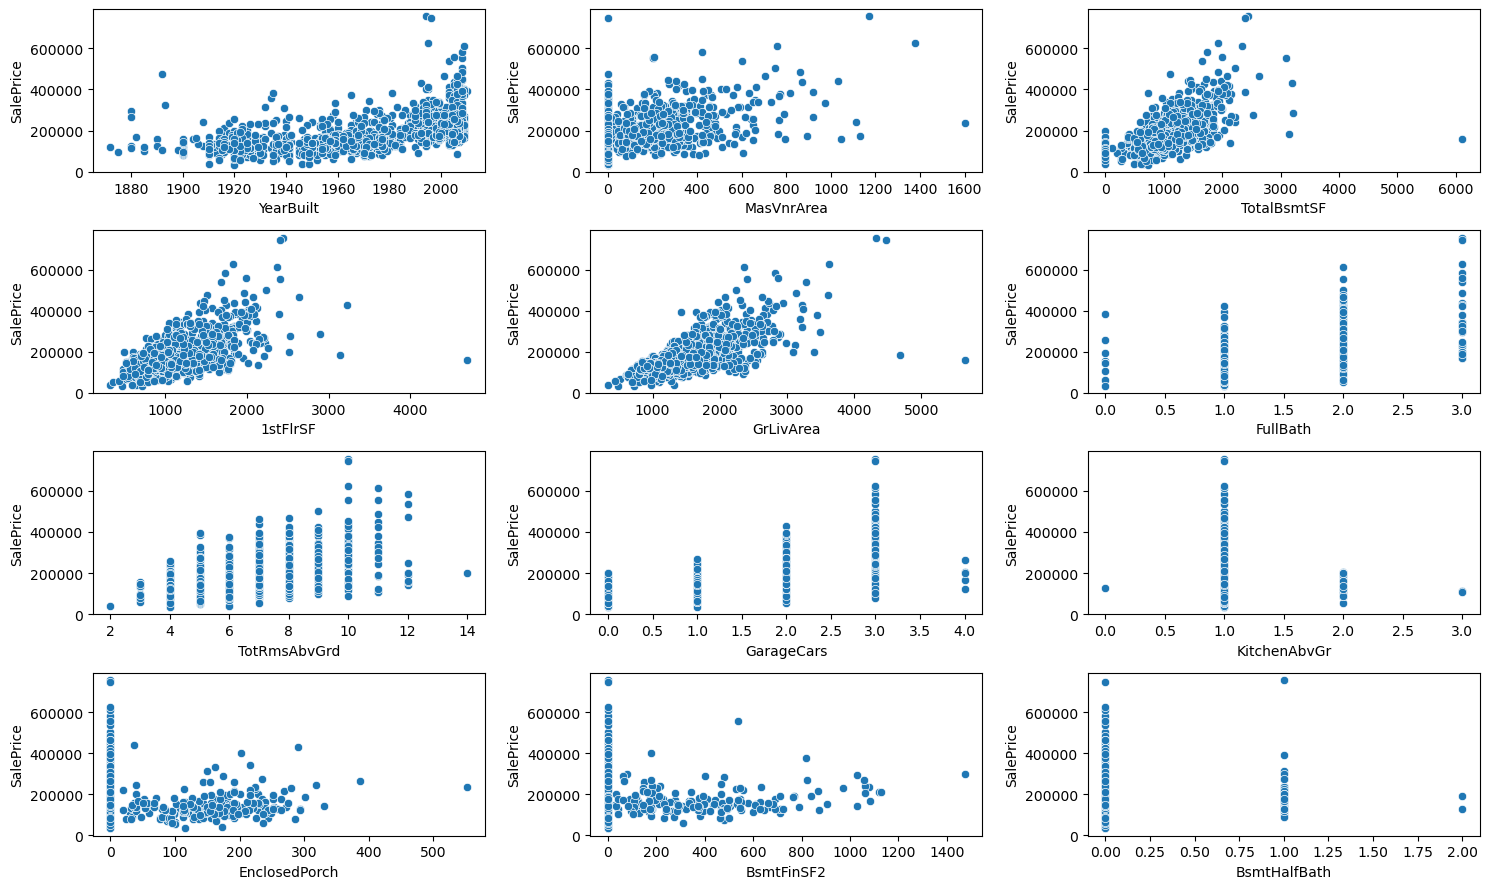

In [39]:
## Let's visualise some of the highly correlated numerical features.



# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 9))

# Scatterplot for the first subplot
sns.scatterplot(data=df_cleaned, x="YearBuilt", y="SalePrice", ax=axes[0,0])
#axes[0].set_title('Scatterplot 1')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="MasVnrArea", y="SalePrice", ax=axes[0,1])
#axes[1].set_title('Scatterplot 2')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="TotalBsmtSF", y="SalePrice", ax=axes[0,2])
#axes[1].set_title('Scatterplot 2')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="1stFlrSF", y="SalePrice", ax=axes[1,0])
#axes[1].set_title('Scatterplot 2')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="GrLivArea", y="SalePrice", ax=axes[1,1])
#axes[1].set_title('Scatterplot 2')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="FullBath", y="SalePrice", ax=axes[1,2])
#axes[1].set_title('Scatterplot 2')

# Scatterplot for the second subplot
sns.scatterplot(data=df_cleaned, x="TotRmsAbvGrd", y="SalePrice", ax=axes[2,0])
#axes[1].set_title('Scatterplot 2')

sns.scatterplot(data=df_cleaned, x="GarageCars", y="SalePrice", ax=axes[2,1])

sns.scatterplot(data=df_cleaned, x="KitchenAbvGr", y="SalePrice", ax=axes[2,2])

sns.scatterplot(data=df_cleaned, x="EnclosedPorch", y="SalePrice", ax=axes[3,0])

sns.scatterplot(data=df_cleaned, x="BsmtFinSF2", y="SalePrice", ax=axes[3,1])

sns.scatterplot(data=df_cleaned, x="BsmtHalfBath", y="SalePrice", ax=axes[3,2])

#Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Visualisation of Categorical Plot

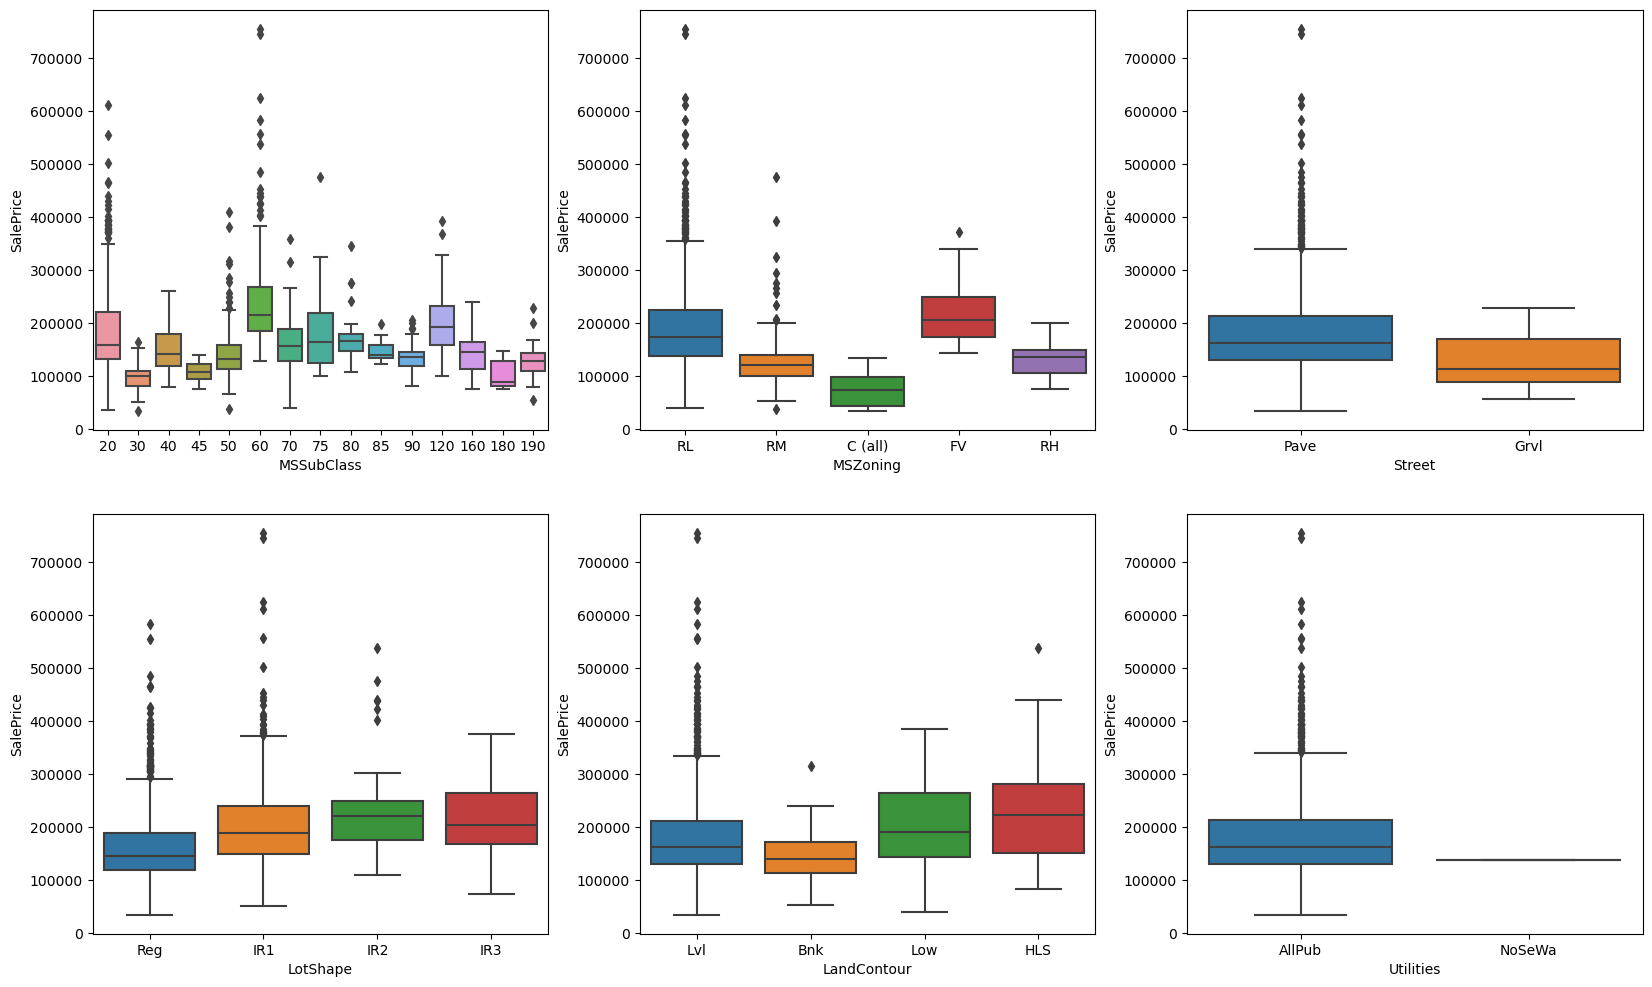

In [40]:

# MSSubClass, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig
# LandSlope, Neighborhood, Neighborhood, Condition1, Condition2, BldgType
# HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual
# ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating
# HeatingQC, CentralAir, Electrical, KitchenQual, Functional, GarageType, GarageFinish, GarageQual
# GarageCond, GarageCond, PavedDrive, SaleType, SaleCondition

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df_cleaned)
plt.show()

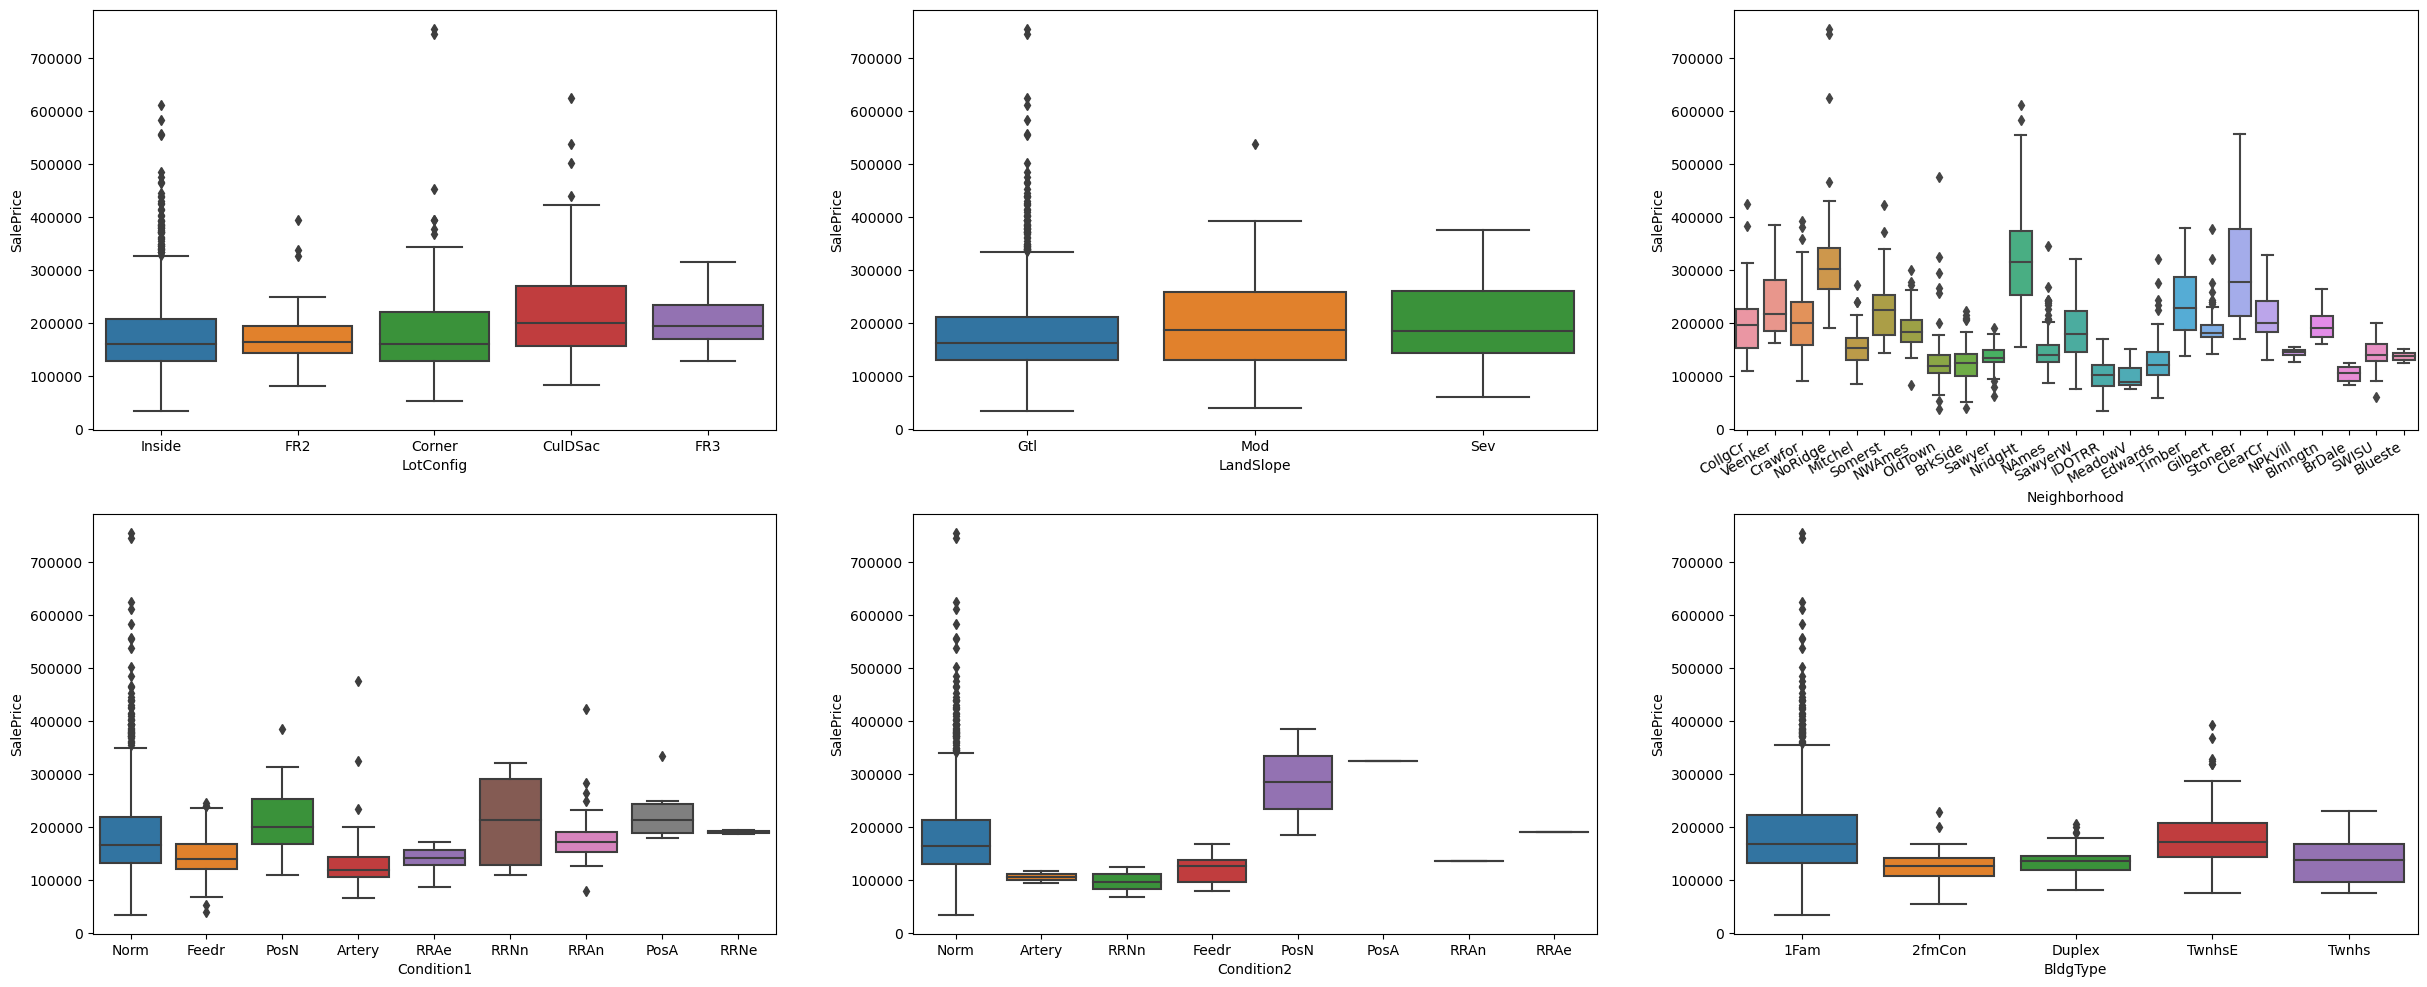

In [41]:
plt.figure(figsize=(30, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df_cleaned)
plt.xticks(rotation=30, ha='right')
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df_cleaned)
plt.show()

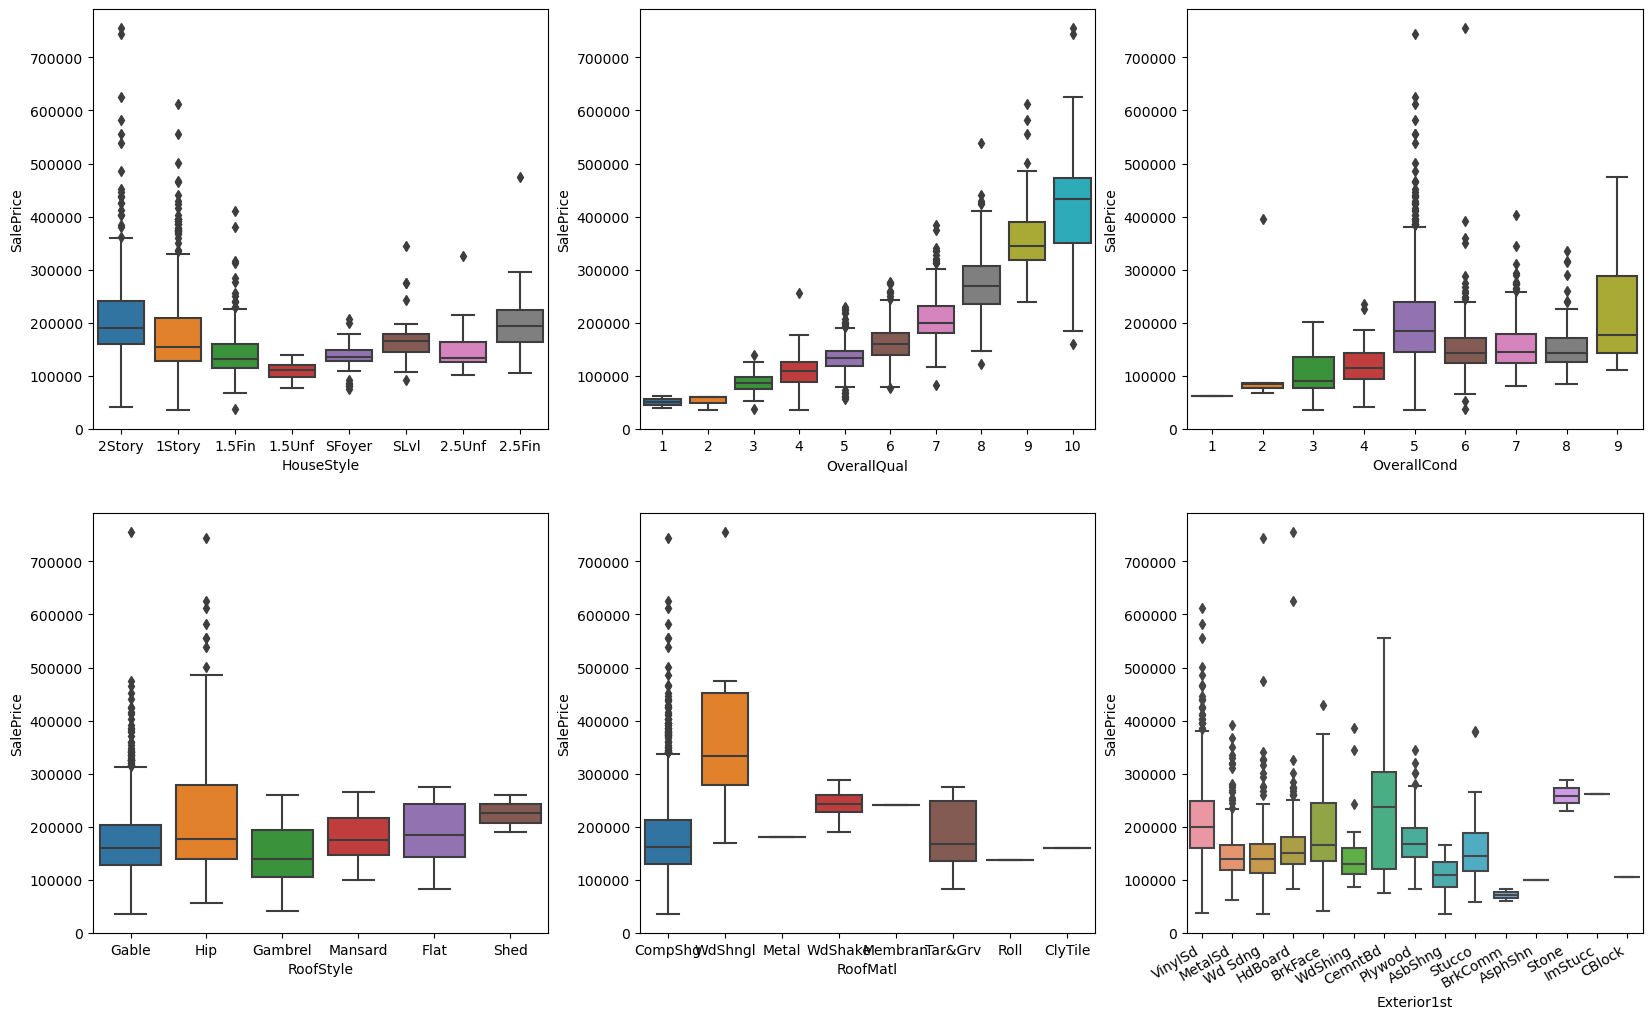

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df_cleaned)
plt.xticks(rotation=30, ha='right')
plt.show()

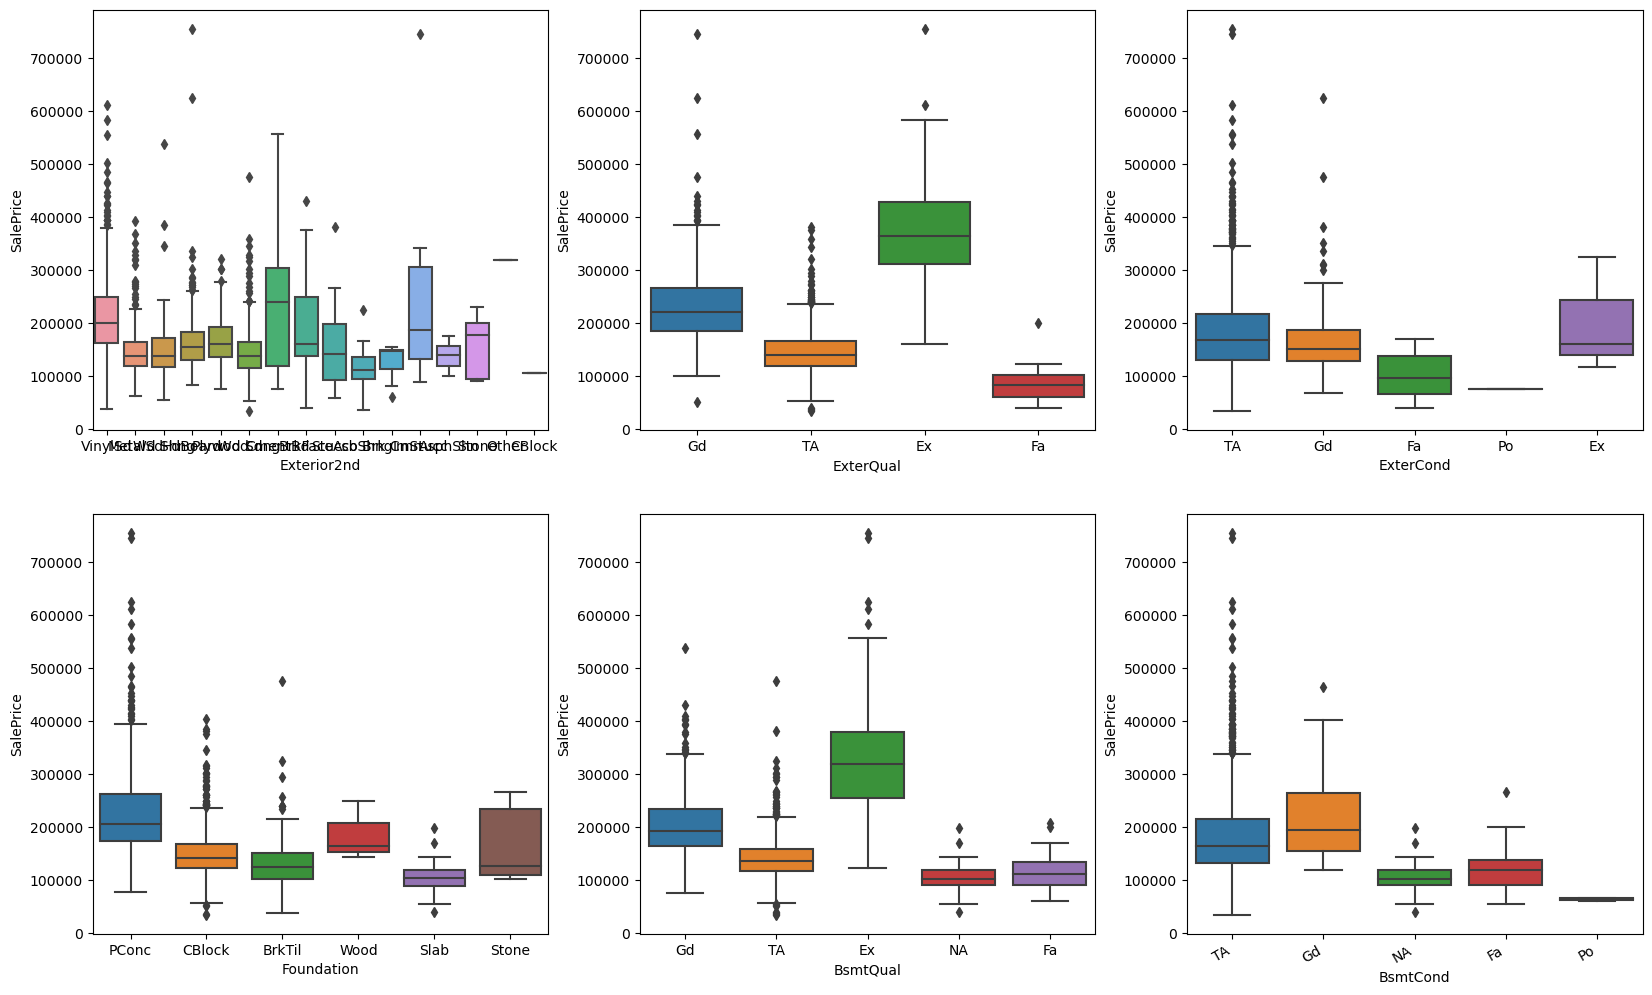

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df_cleaned)
plt.xticks(rotation=30, ha='right')
plt.show()

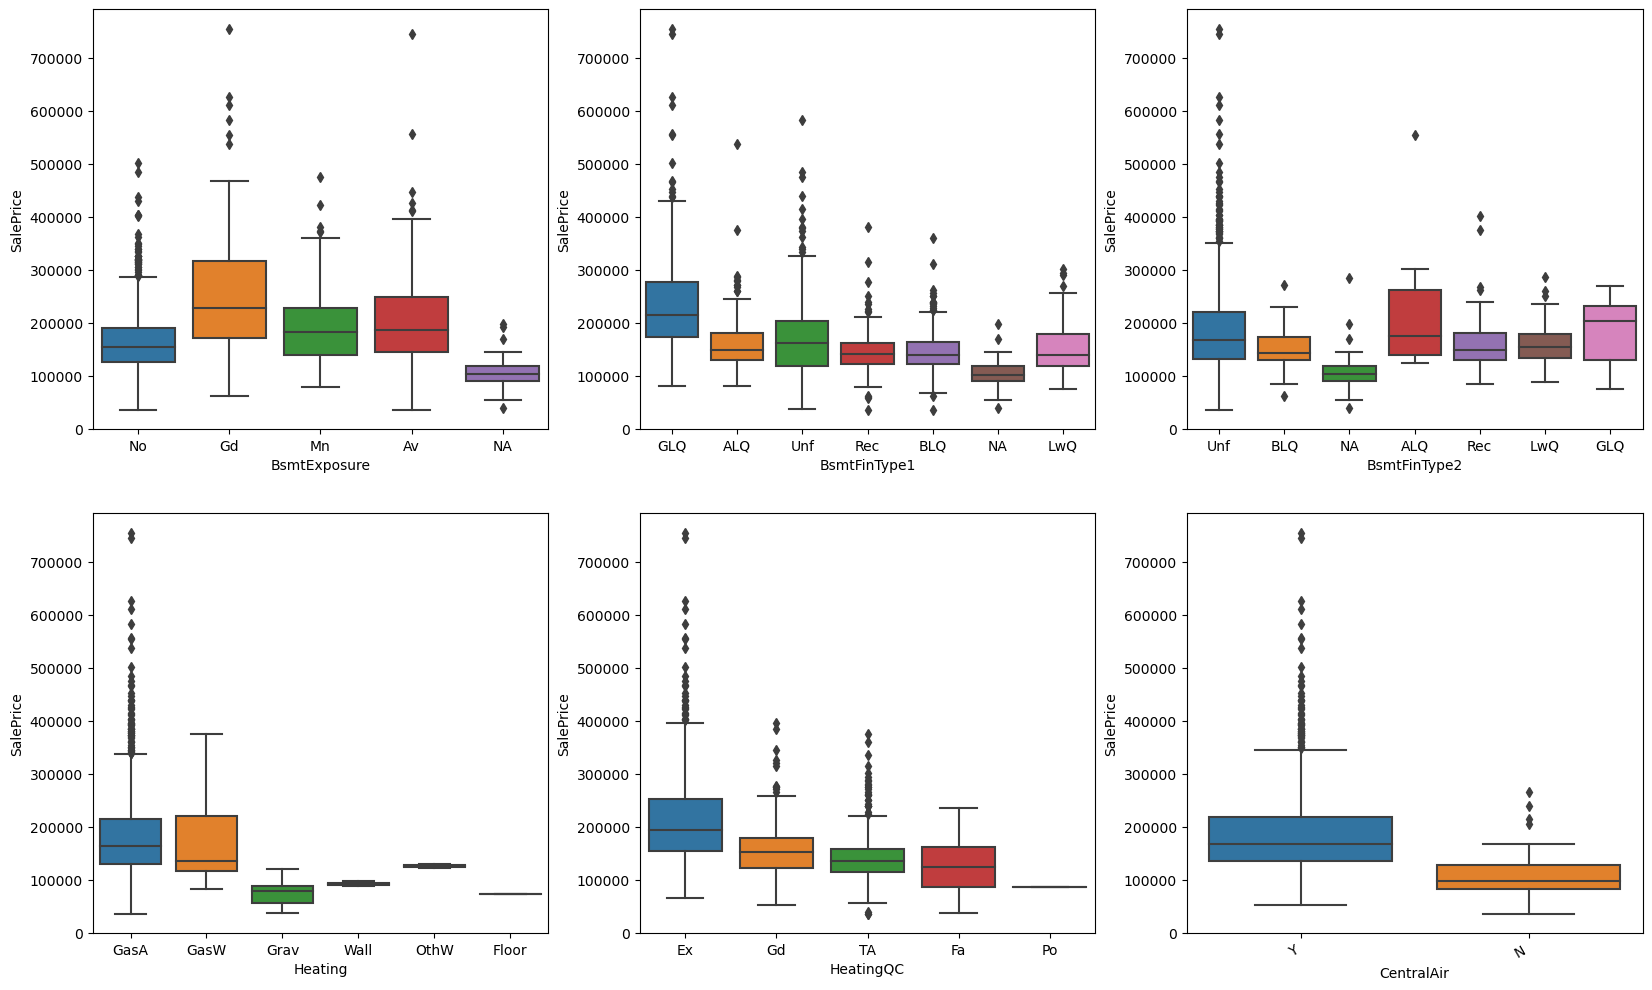

In [44]:
#BsmtExposure, BsmtFinType1, BsmtFinType2, Heating
# HeatingQC, CentralAir, Electrical, KitchenQual, Functional, GarageType, GarageFinish, GarageQual
# GarageCond, GarageCond, PavedDrive, SaleType, SaleCondition

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df_cleaned)
plt.xticks(rotation=30, ha='right')
plt.show()

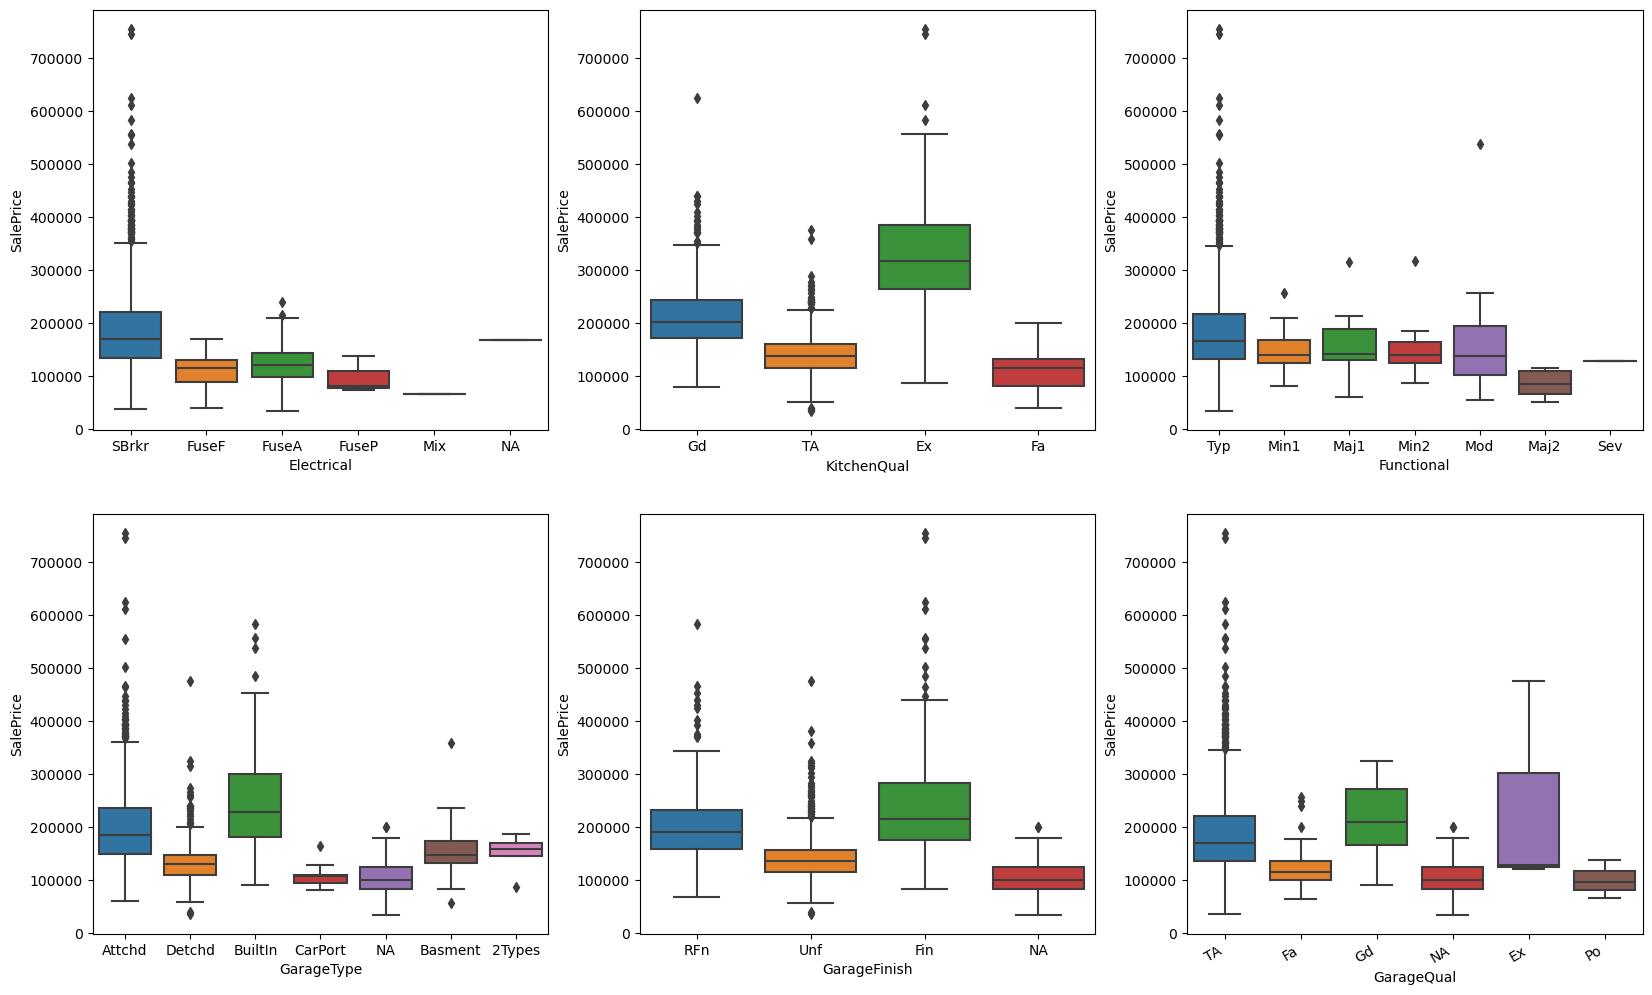

In [45]:
#Electrical, KitchenQual, Functional, GarageType, GarageFinish, GarageQual
# GarageCond, GarageCond, PavedDrive, SaleType, SaleCondition

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,6)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df_cleaned)
plt.xticks(rotation=30, ha='right')
plt.show()

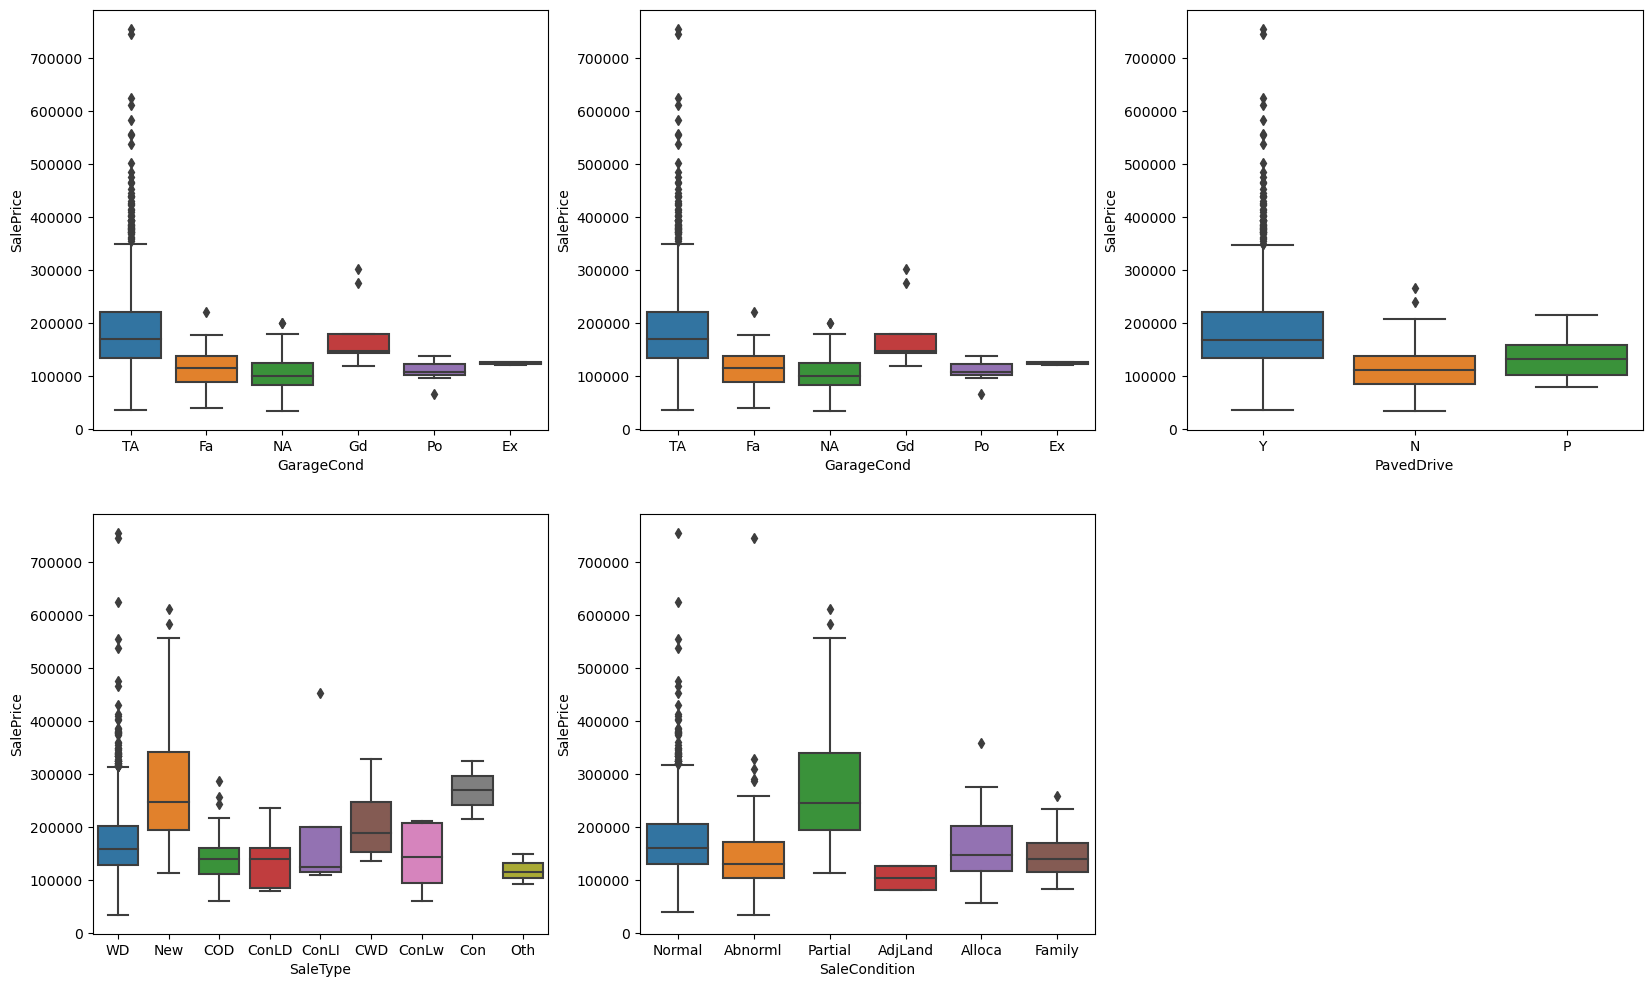

In [46]:
# GarageCond, GarageCond, PavedDrive, SaleType, SaleCondition
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,4)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_cleaned)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_cleaned)
plt.show()

### Data Preprocessing and Transformation

In [47]:
df_cleaned.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


#### Create dummy Variables for categorical features

In [48]:
MSSubClass_map = { 20 : 'mssub20', 30 : 'mssub30', 40 : 'mssub40', 45: 'mssub45', 50: 'mssub50', 
               60: 'mssub60', 70:'mssub70', 75: 'mssub75', 80: 'mssub80',
                  85: 'mssub85', 90: 'mssub90', 120: 'mssub120', 150: 'mssub150',
                  160: 'mssub160', 180: 'mssub180', 190: 'mssub190'
                 }
df_cleaned['MSSubClass'] = df_cleaned['MSSubClass'].map(MSSubClass_map)

In [49]:
mszone_map = { 'A' : 'mszone_A', 'C' : 'mszone_C', 'FV' : 'mszone_FV', 'I': 'mszone_I', 'RH': 'mszone_RH', 
               'RL': 'mszone_RL', 'RP':'mszone_RP', 'RM': 'mszone_RM'
            }
df_cleaned['MSZoning'] = df_cleaned['MSZoning'].map(mszone_map)

In [50]:
hstyle_map = { '1Story' : '1_story', '1.5Fin' : '1_half_story_fin', '1.5Unf' : '1_half_story_un', '2Story': '2_story', 
              '2.5Fin': '2_half_story_fin', 
               '2.5Unf': '2_half_story_un', 'SFoyer':'split_foyer', 'SLvl': 'split_level'
            }
df_cleaned['HouseStyle'] = df_cleaned['HouseStyle'].map(hstyle_map)

In [51]:
overallqual_map = { 10 : 'qual_very_ex', 9 : 'qual_exc', 8 : 'qual_very_good', 7: 'qual_good', 
              6: 'qual_avg', 
               5: 'qual_below_avg', 4:'qual_fair', 3: 'qual_fair', 2:'qual_poor', 1:'qual_very_poor'
            }
df_cleaned['OverallQual'] = df_cleaned['OverallQual'].map(overallqual_map)

In [52]:
overallcond_map = { 10 : 'cond_very_ex', 9 : 'cond_exc', 8 : 'cond_very_good', 7: 'cond_good', 
              6: 'cond_avg', 
               5: 'cond_below_avg', 4:'cond_fair', 3: 'cond_fair', 2:'cond_poor', 1:'cond_very_poor'
            }
df_cleaned['OverallCond'] = df_cleaned['OverallCond'].map(overallcond_map)

In [53]:
ext1_map = { 'AsbShng' : 'ext1_AsbShng', 'AsphShn' : 'ext1_AsphShn', 'BrkComm' : 'ext1_BrkComm', 
            'BrkFace': 'ext1_BrkFace', 
              'CBlock': 'ext1_CBlock', 
               'CemntBd': 'ext1_CemntBd', 'HdBoard':'ext1_HdBoard', 
        'ImStucc': 'ext1_ImStucc', 'MetalSd':'ext1_MetalSd', 'Other':'ext1_Other',
            'Plywood':'ext1_Plywood','PreCast': 'ext1_PreCast',
            'Stone': 'ext1_Stone', 'Stucco':'ext1_Stucco',
            'VinylSd': 'ext1_VinylSd',
            'Wd Sdng':'ext1_Wd_Sdng',
            'WdShing':'ext1_WdShing'
            }
df_cleaned['Exterior1st'] = df_cleaned['Exterior1st'].map(ext1_map)

In [54]:
ext2_map = { 'AsbShng' : 'ext2_AsbShng', 'AsphShn' : 'ext2_AsphShn', 'BrkComm' : 'ext2_BrkComm', 
            'BrkFace': 'ext2_BrkFace', 
              'CBlock': 'ext2_CBlock', 
               'CemntBd': 'ext2_CemntBd', 'HdBoard':'ext2_HdBoard', 
        'ImStucc': 'ext2_ImStucc', 'MetalSd':'ext2_MetalSd', 'Other':'ext2_Other',
            'Plywood':'ext2_Plywood','PreCast': 'ext2_PreCast',
            'Stone': 'ext2_Stone', 'Stucco':'ext2_Stucco',
            'VinylSd': 'ext2_VinylSd',
            'Wd Sdng':'ext2_Wd_Sdng',
            'WdShing':'ext2_WdShing'
            }
df_cleaned['Exterior2nd'] = df_cleaned['Exterior2nd'].map(ext2_map)

In [55]:
extqual_map = { 'Ex' : 'extqual_Ex', 'Gd' : 'extqual_Gd', 'TA' : 'extqual_TA', 'Fa': 'extqual_Fa', 
              'Po': 'extqual_Po'
            }
df_cleaned['ExterQual'] = df_cleaned['ExterQual'].map(extqual_map)

In [56]:
extcond_map = { 'Ex' : 'extcond_Ex', 'Gd' : 'extcond_Gd', 'TA' : 'extcond_TA', 'Fa': 'extcond_Fa', 
              'Po': 'extcond_Po'
            }
df_cleaned['ExterCond'] = df_cleaned['ExterCond'].map(extcond_map)

In [57]:
bsmtqual_map = { 'Ex' : 'bsmtqual_Ex', 'Gd' : 'bsmtqual_Gd', 'TA' : 'bsmtqual_TA', 'Fa': 'bsmtqual_Fa', 
              'Po': 'bsmtqual_Po','NA':'no_bsmt1'
            }
df_cleaned['BsmtQual'] = df_cleaned['BsmtQual'].map(bsmtqual_map)

In [58]:
bsmtcond_map = { 'Ex' : 'bsmtcond_Ex', 'Gd' : 'bsmtcond_Gd', 'TA' : 'bsmtcond_TA', 'Fa': 'bsmtcond_Fa', 
              'Po': 'bsmtcond_Po','NA':'no_bsmt2'
            }
df_cleaned['BsmtCond'] = df_cleaned['BsmtCond'].map(bsmtqual_map)

In [59]:
bsmtexposure_map = {  'Gd' : 'bsmtexposure_Gd', 'Av' : 'bsmtexposure_avg', 'Mn': 'bsmtexposure_Mn', 
              'No': 'bsmtexposure_No','NA':'no_bsmt3'
            }
df_cleaned['BsmtExposure'] = df_cleaned['BsmtExposure'].map(bsmtexposure_map)

In [60]:
bsmtftype1_map = {  'GLQ' : 'bsmtftype1_GLQ', 'ALQ' : 'bsmtftype1_ALQ', 'BLQ': 'bsmtftype1_BLQ', 
              'Rec': 'bsmtftype1_Rec','LwQ':'bsmtftype1_LwQ','Unf':'bsmtftype1_Unf',
                  'NA':'no_bsmt4'
            }
df_cleaned['BsmtFinType1'] = df_cleaned['BsmtFinType1'].map(bsmtftype1_map)

In [61]:
bsmtftype2_map = {  'GLQ' : 'bsmtftype2_GLQ', 'ALQ' : 'bsmtftype2_ALQ', 'BLQ': 'bsmtftype2_BLQ', 
              'Rec': 'bsmtftype2_Rec','LwQ':'bsmtftype2_LwQ','Unf':'bsmtftype2_Unf',
                  'NA':'no_bsmt5'
            }
df_cleaned['BsmtFinType2'] = df_cleaned['BsmtFinType2'].map(bsmtftype2_map)

In [62]:
heatqc_map = {  'Ex' : 'heatqc_Ex', 'Gd' : 'heatqc_Gd', 'TA': 'heatqc_TA', 
              'Fa': 'heatqc_Fa','Po':'heatqc_Po'
            }
df_cleaned['HeatingQC'] = df_cleaned['HeatingQC'].map(heatqc_map)

In [63]:
kitqual_map = {  'Ex' : 'kitqual_Ex', 'Gd' : 'kitqual_Gd', 'TA': 'kitqual_TA', 
              'Fa': 'kitqual_Fa','Po':'kitqual_Po'
            }
df_cleaned['KitchenQual'] = df_cleaned['KitchenQual'].map(kitqual_map)

In [64]:
garfin_map = {  'Fin' : 'garfin_Fin', 'RFn' : 'garfin_RFn', 'Unf': 'garfin_Unf', 
              'NA': 'garfin_NA'
            }
df_cleaned['GarageFinish'] = df_cleaned['GarageFinish'].map(garfin_map)

In [65]:
garqual_map = {  'Ex' : 'garqual_Ex', 'Gd' : 'garqual_Gd', 'TA': 'garqual_TA', 
              'Fa': 'garqual_Fa','Po':'garqual_Po','NA':'garqual_na'
            }
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].map(garqual_map)

In [66]:
garcond_map = {  'Ex' : 'garcond_Ex', 'Gd' : 'garcond_Gd', 'TA': 'garcond_TA', 
              'Fa': 'garcond_Fa','Po':'garcond_Po','NA':'garcond_na'
            }
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].map(garcond_map)

In [67]:
paved_map = {  'Y' : 'paved_y', 'P' : 'paved_p', 'N': 'paved_n'
            }
df_cleaned['PavedDrive'] = df_cleaned['PavedDrive'].map(paved_map)

In [68]:
dummy_msubclass = pd.get_dummies(df_cleaned['MSSubClass'], drop_first = True)
dummy_mzone = pd.get_dummies(df_cleaned['MSZoning'], drop_first = True)
dummy_Street = pd.get_dummies(df_cleaned['Street'], drop_first = True)
dummy_LotShape = pd.get_dummies(df_cleaned['LotShape'], drop_first = True)
dummy_LandContour = pd.get_dummies(df_cleaned['LandContour'], drop_first = True)
dummy_Utilities = pd.get_dummies(df_cleaned['Utilities'], drop_first = True)
dummy_LotConfig = pd.get_dummies(df_cleaned['LotConfig'], drop_first = True)
dummy_LandSlope = pd.get_dummies(df_cleaned['LandSlope'], drop_first = True)
dummy_Neighborhood = pd.get_dummies(df_cleaned['Neighborhood'], drop_first = True)
dummy_Condition1 = pd.get_dummies(df_cleaned['Condition1'], drop_first = True)
dummy_Condition2 = pd.get_dummies(df_cleaned['Condition2'], drop_first = True)
dummy_BldgType = pd.get_dummies(df_cleaned['BldgType'], drop_first = True)
dummy_HouseStyle = pd.get_dummies(df_cleaned['HouseStyle'], drop_first = True)
dummy_OverallQual = pd.get_dummies(df_cleaned['OverallQual'], drop_first = True)
dummy_OverallCond = pd.get_dummies(df_cleaned['OverallCond'], drop_first = True)
dummy_RoofStyle = pd.get_dummies(df_cleaned['RoofStyle'], drop_first = True)
dummy_RoofMatl = pd.get_dummies(df_cleaned['RoofMatl'], drop_first = True)
dummy_Exterior1st = pd.get_dummies(df_cleaned['Exterior1st'], drop_first = True)
dummy_Exterior2nd = pd.get_dummies(df_cleaned['Exterior2nd'], drop_first = True)
dummy_ExterQual = pd.get_dummies(df_cleaned['ExterQual'], drop_first = True)
dummy_ExterCond = pd.get_dummies(df_cleaned['ExterCond'], drop_first = True)
dummy_Foundation = pd.get_dummies(df_cleaned['Foundation'], drop_first = True)
dummy_BsmtQual = pd.get_dummies(df_cleaned['BsmtQual'], drop_first = True)
dummy_BsmtCond = pd.get_dummies(df_cleaned['BsmtCond'], drop_first = True)
dummy_BsmtExposure = pd.get_dummies(df_cleaned['BsmtExposure'], drop_first = True)
dummy_BsmtFinType1 = pd.get_dummies(df_cleaned['BsmtFinType1'], drop_first = True)
dummy_BsmtFinType2 = pd.get_dummies(df_cleaned['BsmtFinType2'], drop_first = True)
dummy_Heating = pd.get_dummies(df_cleaned['Heating'], drop_first = True)
dummy_HeatingQC = pd.get_dummies(df_cleaned['HeatingQC'], drop_first = True)
dummy_CentralAir = pd.get_dummies(df_cleaned['CentralAir'], drop_first = True)
dummy_Electrical = pd.get_dummies(df_cleaned['Electrical'], drop_first = True)
dummy_KitchenQual = pd.get_dummies(df_cleaned['KitchenQual'], drop_first = True)
dummy_Functional = pd.get_dummies(df_cleaned['Functional'], drop_first = True)
dummy_GarageType = pd.get_dummies(df_cleaned['GarageType'], drop_first = True)
dummy_GarageFinish = pd.get_dummies(df_cleaned['GarageFinish'], drop_first = True)
dummy_GarageQual = pd.get_dummies(df_cleaned['GarageQual'], drop_first = True)
dummy_GarageCond = pd.get_dummies(df_cleaned['GarageCond'], drop_first = True)
dummy_PavedDrive = pd.get_dummies(df_cleaned['PavedDrive'], drop_first = True)
dummy_SaleType = pd.get_dummies(df_cleaned['SaleType'], drop_first = True)
dummy_SaleCondition = pd.get_dummies(df_cleaned['SaleCondition'], drop_first = True)

In [69]:
## Let's drop unwanted columns

df_cleaned.drop(['MSSubClass','SaleCondition','SaleType','KitchenQual','Electrical','CentralAir','HeatingQC','Heating',
         'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual',
         'Exterior2nd','Exterior1st','RoofMatl','RoofStyle','OverallCond','OverallQual','HouseStyle','BldgType',
         'Condition2','Condition1','Neighborhood','LandSlope','LotConfig','Utilities','LandContour','LotShape',
         'Street','MSZoning',
         'PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','Functional'], 
        axis = 1, inplace = True)

In [70]:
### concat these dummy variables to original dataframe

df_cleaned = pd.concat([df_cleaned, dummy_msubclass], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_mzone], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Street], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_LotShape], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_LandContour], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Utilities], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_LotConfig], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_LandSlope], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Neighborhood], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Condition1], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Condition2], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BldgType], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_HouseStyle], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_OverallQual], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_OverallCond], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_RoofStyle], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_RoofMatl], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Exterior1st], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Exterior2nd], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_ExterQual], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_ExterCond], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Foundation], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BsmtQual], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BsmtCond], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BsmtExposure], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BsmtFinType1], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_BsmtFinType2], axis = 1)

df_cleaned = pd.concat([df_cleaned, dummy_Heating], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_HeatingQC], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_CentralAir], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Electrical], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_KitchenQual], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_Functional], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_GarageType], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_GarageFinish], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_GarageQual], axis = 1)

df_cleaned = pd.concat([df_cleaned, dummy_GarageCond], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_PavedDrive], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_SaleType], axis = 1)
df_cleaned = pd.concat([df_cleaned, dummy_SaleCondition], axis = 1)

In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 263 entries, Id to Partial
dtypes: bool(228), float64(3), int64(32)
memory usage: 724.4 KB


In [72]:
### Now we have total 263 columns altogether

In [73]:
df_cleaned.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,mssub160,mssub180,mssub190,mssub20,mssub30,mssub40,mssub45,mssub50,mssub60,mssub70,mssub75,mssub80,mssub85,mssub90,mszone_RH,mszone_RL,mszone_RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1_half_story_un,1_story,2_half_story_fin,2_half_story_un,2_story,split_foyer,split_level,qual_below_avg,qual_exc,qual_fair,qual_good,qual_poor,qual_very_ex,qual_very_good,qual_very_poor,cond_below_avg,cond_exc,cond_fair,cond_good,cond_poor,cond_very_good,cond_very_poor,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,ext1_AsphShn,ext1_BrkComm,ext1_BrkFace,ext1_CBlock,ext1_CemntBd,ext1_HdBoard,ext1_ImStucc,ext1_MetalSd,ext1_Plywood,ext1_Stone,ext1_Stucco,ext1_VinylSd,ext1_WdShing,ext1_Wd_Sdng,ext2_AsphShn,ext2_BrkFace,ext2_CBlock,ext2_HdBoard,ext2_ImStucc,ext2_MetalSd,ext2_Other,ext2_Plywood,ext2_Stone,ext2_Stucco,ext2_VinylSd,ext2_Wd_Sdng,extqual_Fa,extqual_Gd,extqual_TA,extcond_Fa,extcond_Gd,extcond_Po,extcond_TA,CBlock,PConc,Slab,Stone,Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,no_bsmt1,bsmtqual_Gd,bsmtqual_Po,bsmtqual_TA,no_bsmt1,bsmtexposure_Mn,bsmtexposure_No,bsmtexposure_avg,no_bsmt3,bsmtftype1_BLQ,bsmtftype1_GLQ,bsmtftype1_LwQ,bsmtftype1_Rec,bsmtftype1_Unf,no_bsmt4,bsmtftype2_BLQ,bsmtftype2_GLQ,bsmtftype2_LwQ,bsmtftype2_Rec,bsmtftype2_Unf,no_bsmt5,GasA,GasW,Grav,OthW,Wall,heatqc_Fa,heatqc_Gd,heatqc_Po,heatqc_TA,Y,FuseF,FuseP,Mix,NA,SBrkr,kitqual_Fa,kitqual_Gd,kitqual_TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,garfin_NA,garfin_RFn,garfin_Unf,garqual_Fa,garqual_Gd,garqual_Po,garqual_TA,garqual_na,garcond_Fa,garcond_Gd,garcond_Po,garcond_TA,garcond_na,paved_p,paved_y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,Fal

In [74]:
df_cleaned['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Split data for training and testing

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df_cleaned = df_cleaned.dropna()

In [77]:
## Since we have only few records, I made a 80 - 20 split means 80 Percentage of data for training and 20 perc testing.

df_train, df_test = train_test_split(df_cleaned, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling features

In [78]:
## Here I used Min Max scaling of feature

from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

## Applying scaling to all numeric variable

num_vars = ['LotFrontage',
    'LotArea',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

### Applying Recursive Feature Elimination

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
#### Divide train data into X and y


In [82]:
X_train = df_train.drop(columns=['SalePrice','Id'])
y_train = df_train['SalePrice']

In [83]:
### Let's take initially 100 features 

In [84]:
lm = LinearRegression()
#lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 83),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('BsmtHalfBath', False, 76),
 ('FullBath', False, 9),
 ('HalfBath', False, 65),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 98),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 43),
 ('OpenPorchSF', False, 109),
 ('EnclosedPorch', False, 45),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 42),
 ('PoolArea', True, 1),
 ('MiscVal', False, 50),
 ('MoSold', False, 95),
 ('YrSold', False, 152),
 ('mssub160', False, 57),
 ('mssub180', False, 118),
 ('mssub190', False, 71),
 ('mssub20', False, 69),
 ('mssub30', Fa

In [86]:
### Get RFE selected columns

rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', '3SsnPorch', 'PoolArea',
       'mssub90', 'Pave', 'NoSeWa', 'FR3', 'Sev', 'Crawfor', 'NPkVill',
       'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Veenker', 'PosA', 'PosA',
       'PosN', 'RRAe', 'Duplex', 'Twnhs', 'TwnhsE', 'qual_exc', 'qual_good',
       'qual_very_ex', 'qual_very_good', 'cond_exc', 'cond_fair', 'cond_good',
       'cond_very_good', 'cond_very_poor', 'Mansard', 'Shed', 'CompShg',
       'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl',
       'ext1_AsphShn', 'ext1_BrkFace', 'ext1_CBlock', 'ext1_ImStucc',
       'ext2_CBlock', 'ext2_ImStucc', 'extcond_Po', 'Wood', 'no_bsmt1',
       'bsmtqual_Po', 'no_bsmt1', 'no_bsmt4', 'no_bsmt5', 'GasA', 'GasW',
       'Wall', 'Mix', 'kitqual_Fa', 'kitqual_Gd

### Build model using Stats library for getting more detailed statistical info

In [87]:
## create X_train with rfe selected columns

X_train_rfe = X_train[rfe_cols]

### Check VIF values of all the features available

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.astype(float).values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
95,garfin_NA,inf
24,Sev,inf
99,garqual_TA,inf
98,garqual_Po,inf
97,garqual_Gd,inf
96,garqual_Fa,inf
63,ext1_CBlock,inf
94,NA,inf
32,PosA,inf
33,PosA,inf


### Let's take features with vif value < 5

In [90]:
final_features = vif[vif['VIF'] < 5.0 ]
final_features

,Features,VIF
59,WdShake,4.51
89,Basment,4.50
0,LotArea,4.09
53,Shed,3.37
14,Fireplaces,3.29
77,GasW,3.11
60,WdShngl,3.02
91,CarPort,2.78
39,RRAe,2.77
46,qual_very_good,2.74


In [91]:
# So we selected the above 7 features as final list of features which will be used for model building

### Build Model using the above selected features

In [92]:
final_feature_list = list(final_features['Features'])
final_feature_list

['WdShake',
 'Basment',
 'LotArea',
 'Shed',
 'Fireplaces',
 'GasW',
 'WdShngl',
 'CarPort',
 'RRAe',
 'qual_very_good',
 'qual_good',
 'qual_exc',
 'MasVnrArea',
 'qual_very_ex',
 'Membran',
 'kitqual_Fa',
 'NridgHt',
 'Metal',
 'Roll',
 'TwnhsE',
 'cond_good',
 'NoRidge',
 'Mod',
 'Somerst',
 'Wall',
 'PosN',
 'StoneBr',
 'Mansard',
 'PoolArea',
 'cond_fair',
 'PosN',
 'cond_very_good',
 'Twnhs',
 'Crawfor',
 'Mod',
 'ext1_BrkFace',
 'cond_exc',
 'Veenker',
 '3SsnPorch',
 'NPkVill',
 'Wood',
 'NoSeWa',
 'ext2_ImStucc',
 'Con',
 'RRAe',
 'FR3',
 'Oth',
 'NA']

In [93]:
X_train_new = X_train[final_feature_list]
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train_new, y_train)

LinearRegression()

In [94]:
# Make predictions on the train data to make residual analysis
y_pred_train = model.predict(X_train_new)

In [95]:
### Residual Analysis of train data

Text(0.5, 0, 'Errors')

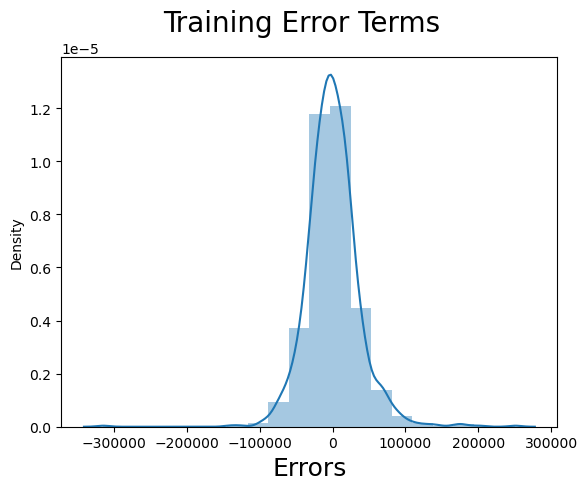

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Training Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [97]:
### Make predictions of Test Data

In [98]:
## Apply scaling on test data

#num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [99]:
X_test = df_test[final_feature_list]
y_test = df_test['SalePrice']

In [100]:
y_pred = model.predict(X_test)

In [101]:
### Model Evaluation

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
#### Checking R2 score

In [104]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.7580762086905704


In [105]:
#### Checking Mean Square Error

In [106]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1740605102.4459162


In [107]:
### Let's plot the predicted and actual values

Text(0, 0.5, 'y_pred')

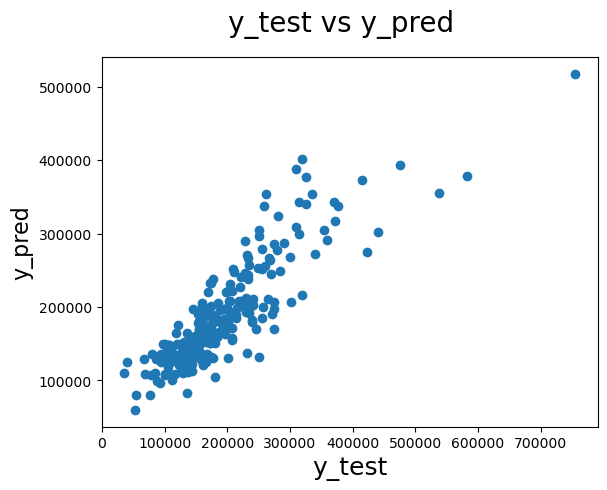

In [108]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

- The R2 score is 75.8 % means it can explain 75.8 % of variance in the dataset.

In [109]:
### Ridge Regression

In [110]:
from sklearn.linear_model import Ridge

In [111]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
for i in lambdas: # for each lambda we get different model coefficients
    
    ridge_model = Ridge(alpha=i)
    
    # Train the model
    ridge_model.fit(X_train_new, y_train)
    
    print("lambda value=",i)
    
    #Computing the r2 score
    y_pred = ridge_model.predict(X_test)
    print("r2 score = " + str(r2_score(y_test, y_pred))) 
    print(ridge_model.coef_) # model coefficients


lambda value= 0
r2 score = 0.7553308598145368
[ 1.38700658e+04 -8.35652221e+03  1.59437233e+05  2.48297905e+04
  5.09776738e+04  3.36492842e+03  4.33517088e+03 -3.23329757e+04
 -2.74879355e+19 -4.87354275e+18  9.01741170e+04  4.99429751e+04
  1.53919737e+05  7.93063894e+04  1.97784171e+05  1.39566146e+04
 -2.35993881e+04  4.28927391e+04 -2.15568899e+03 -2.90478537e+04
 -2.53904716e+04  3.45233610e+03  6.13232766e+04 -9.43176192e+18
  2.14441300e+18  2.67225642e+04 -2.77598956e+04  7.73472686e+18
 -3.96478377e+18  4.94195241e+04  1.19597793e+04  1.44931308e+04
 -2.52911828e+04 -7.73472686e+18  3.96478377e+18  9.11281182e+03
 -3.23132942e+04  2.28385114e+04  9.43176192e+18 -2.14441300e+18
  1.61182828e+04  7.97624198e+03  2.80724102e+04  4.45733934e+04
  2.64112164e+04 -4.15912504e+04 -4.15167016e+04  4.73333596e+04
  2.20647960e+04  2.74879355e+19  4.87354275e+18 -7.98619800e+03
  1.77248002e+04  3.03923549e+04 -1.90196335e+04]
lambda value= 0.001
r2 score = 0.7575155593910782
[ 12312.7

- So from the above hyper parameter tuning we got a r2 score = 75.75% for the  lambda value= 0.001
- So let's choose this as our final lambda for ridge regression

In [112]:
### Lasso Regression

In [113]:
from sklearn.linear_model import Lasso

In [114]:

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
for i in lambdas: # for each lambda we get different model coefficients
    
    #ridge_model = Ridge(alpha=i)
    lasso_model = Lasso(alpha=i)
    # Train the model
    lasso_model.fit(X_train_new, y_train)
    
    print("lambda value=",i)
    
    #Computing the r2 score
    y_pred = lasso_model.predict(X_test)
    print("r2 score = " + str(r2_score(y_test, y_pred))) 
    print(lasso_model.coef_) # model coefficients

lambda value= 0
r2 score = 0.7575189441646939
[  12294.86930837   -1703.49571881  161082.10940444   40919.38446901
   49229.17749207    1258.68758264   16022.19086326  -31408.74851187
  -40790.23528825  -45577.67704342   89643.00140909   47164.92237663
  159108.64070611   79944.9895576   206595.63470354   10000.86998757
  -21235.40571793   42332.35129578   -6413.24767429  -25318.41156001
  -25307.80245882    2505.67490935   63501.76931959   18032.1698671
  -19802.74547459   26538.26750707  -31211.99884015   -8844.25698924
 -135955.01506295   52427.93235076    7939.90400941   10934.43192495
  -22856.46240706   18887.57429609  -18920.16214116    5961.81761565
  -33286.13212612   20977.6303211    -1682.39925693   13923.79083125
   16517.99612204    2318.80746038   34152.64941453   46874.48479149
   28964.70384968  -49988.80857575  -40506.86393062   51211.91317102
   26054.01875499   35979.67601731   38529.96180142  -20118.2847353
   25120.63234908   34724.28508009  -25074.72190527]
lambda

- For Lasso we got a r2score 75.75% for lambda value 0.1,
- So let's take this as our lambda for lasso

In [115]:
### Ridge and Lasso Regression for specific lambda value

In [116]:
ridge_model = Ridge(alpha=0.001)
# Train the model
ridge_model.fit(X_train_new, y_train)
y_pred = ridge_model.predict(X_test)
print("r2 score of Ridge = " + str(r2_score(y_test, y_pred))) 

lasso_model = Lasso(alpha=0.1)
# Train the model
lasso_model.fit(X_train_new, y_train)
y_pred = lasso_model.predict(X_test)
print("r2 score of Lasso = " + str(r2_score(y_test, y_pred))) 

r2 score of Ridge = 0.7575155593910782
r2 score of Lasso = 0.7575182461333504


- So for Lasso and Ridge we got approximately same r2_score as 75.75

### Ridge Coefficients

In [117]:
feature_names = list(X_train_new.columns)
ridge_coefficients_dict = dict(zip(feature_names, ridge_model.coef_))
ridge_coefficients_dict

{'WdShake': 12312.786067557065,
 'Basment': -1709.018821527832,
 'LotArea': 161020.1505447732,
 'Shed': 40860.03489964043,
 'Fireplaces': 49235.20787718176,
 'GasW': 1262.4026799854487,
 'WdShngl': 16025.353305971754,
 'CarPort': -31405.677274171234,
 'RRAe': -3492.3701147878924,
 'qual_very_good': 89639.24544615838,
 'qual_good': 47163.496826475675,
 'qual_exc': 159100.25424096273,
 'MasVnrArea': 79942.4219111569,
 'qual_very_ex': 206568.12324296075,
 'Membran': 9997.620940620633,
 'kitqual_Fa': -21235.33209682983,
 'NridgHt': 42336.54229330484,
 'Metal': -6404.563909074891,
 'Roll': -25292.252846595096,
 'TwnhsE': -25308.859722404224,
 'cond_good': 2505.1463610446317,
 'NoRidge': 63504.517837500025,
 'Mod': -2939.8868840396794,
 'Somerst': 26538.563419382797,
 'Wall': -31197.357269397176,
 'PosN': -77400.06927563857,
 'StoneBr': 52429.89633094772,
 'Mansard': 7933.979182926148,
 'PoolArea': 10946.648077739073,
 'cond_fair': -22857.04085489847,
 'cond_very_good': 5960.639066552696,
 '

### Lasso Coefficients

In [118]:
lasso_coefficients_dict = dict(zip(feature_names, lasso_model.coef_))
lasso_coefficients_dict

{'WdShake': 12357.452885258088,
 'Basment': -1709.0079258127694,
 'LotArea': 161052.19786853204,
 'Shed': 40622.11660798333,
 'Fireplaces': 49234.41932675945,
 'GasW': 1251.0668708399241,
 'WdShngl': 15990.325064048255,
 'CarPort': -31395.43576102208,
 'RRAe': -168.59217902778767,
 'qual_very_good': 89644.87312191667,
 'qual_good': 47166.82211118703,
 'qual_exc': 159110.62480391984,
 'MasVnrArea': 79930.76537655278,
 'qual_very_ex': 206587.8738571911,
 'Membran': 9845.180030079153,
 'kitqual_Fa': -21230.235800964023,
 'NridgHt': 42327.35353222263,
 'Metal': -6289.887898955079,
 'Roll': -25197.61906823355,
 'TwnhsE': -25304.60378837038,
 'cond_good': 2505.6978294154383,
 'NoRidge': 63500.71880791714,
 'Mod': -0.035702048404756735,
 'Somerst': 26533.43748120893,
 'Wall': -31173.2435431356,
 'PosN': -10159.196840439496,
 'StoneBr': 52419.406034608,
 'Mansard': 7907.707814528592,
 'PoolArea': 10907.689784782337,
 'cond_fair': -22856.20599475993,
 'cond_very_good': 5958.684688314885,
 'Twnh

In [119]:
### Inference

- Positive Predictors
    
        WdShake - Roof Material: Wood Shake
        LotArea - Lot size in square feet
        Shed - RoofStyle
        Fireplaces - Number of fireplaces
        GasW - Type of heating: Gas hot water or steam heat
        WdShngl - Roof Material: WdShngl
        qual_very_good - Overall Quality of house : very good
        qual_good - Overall Quality of house : good
        qual_exc - Overall Quality of house : Excellent
        qual_very_ex - Overall Quality of house : Very Excellent
        MasVnrArea - Masonry veneer area in square feet
        Membran - Roof Material: Membran
        NridgHt - Neighborhood NridgHt
        cond_good - Overall condition of the house: Good
        NoRidge - Neighborhood NoRidge
        Somerst - Neighborhood Somerst
        StoneBr - Neighborhood StoneBr
        Mansard - Roof Style: Mansard
        PoolArea - Area of the Pool
        cond_very_good - Overall condition of house: very good
        Crawfor - Neighborhood Crawfor
        ext1_BrkFace - Exterior covering on house: Brick face
        cond_exc - Overall condition of house: excellent
        Veenker - Neighborhood Veenker
        3SsnPorch - Three season porch area in square feet
        NPkVill - Neighborhood NPkVill
        ext2_ImStucc - Exterior covering on house: Imitation Stucco
        Con - Sale Type: Court Officer Deed/Estate
    
- Negative Predictors
    
        Basment - Garage Type: Basment Garage
        CarPort - Garage Type: Car Port
        RRAe - Adjacent to East-West Railroad
        kitqual_Fa - Kitchen Quality: Fair
        Metal - Roof material: Metal
        Roll - Roof material Roll
        TwnhsE - Type of dwelling: Townhouse End Unit
        Mod - Home functionality: Moderate Deductions
        Wall - Type of heating: Wall furnace
        PosN - Near positive off-site feature--park, greenbelt, etc.
        cond_fair - Overall condition of house: fair
        Twnhs - Type of dwelling: Townhouse Inside Unit
        Wood - Type of foundation: Wood
        NoSeWa - Utilities available: Electricity and Gas Only
        FR3 - Lot configuration: Frontage on 3 sides of property
        Oth - Type of sale: Other
        NA - No alley access


In [120]:
# sorted_items = sorted(lasso_coefficients_dict.items(), key=lambda item: item[1])
# print(sorted_items)